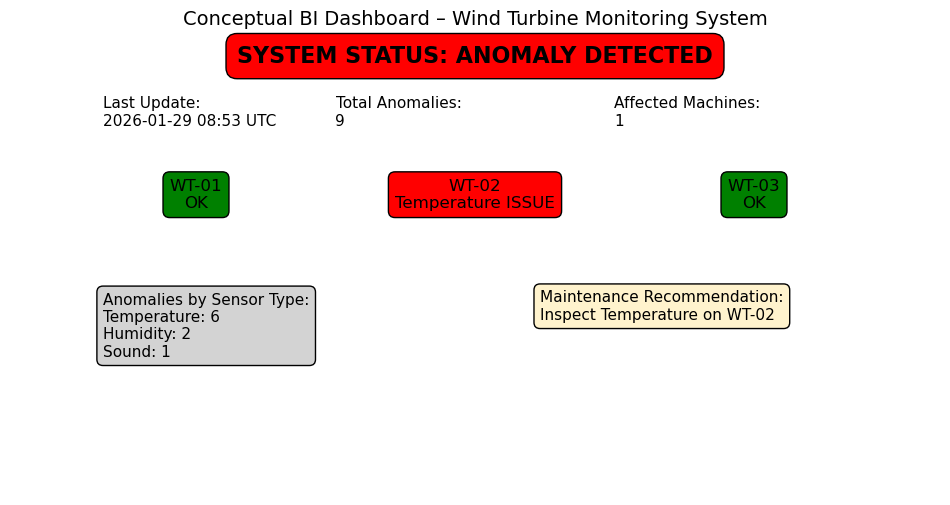

In [1]:
#Conceptual dashboard for managers to use

import matplotlib.pyplot as plt
from datetime import datetime, timezone

#Simulated dashboard state 
machines = {
    "WT-01": {"status": "OK", "issue": None},
    "WT-02": {"status": "ANOMALY", "issue": "Temperature"},
    "WT-03": {"status": "OK", "issue": None},
}

sensor_anomalies = {
    "Temperature": 6,
    "Humidity": 2,
    "Sound": 1
}

total_anomalies = sum(sensor_anomalies.values())
affected_machines = sum(1 for m in machines.values() if m["status"] == "ANOMALY")

system_status = "ANOMALY DETECTED" if affected_machines > 0 else "All Good"
last_update = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M UTC")

#Create dashboard
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")

#System status banner
banner_color = "red" if system_status != "All Good" else "green"
ax.text(
    0.5, 0.95,
    f"SYSTEM STATUS: {system_status}",
    ha="center", va="center",
    fontsize=16, fontweight="bold",
    bbox=dict(facecolor=banner_color, edgecolor="black", boxstyle="round,pad=0.5")
)

#KPI row
ax.text(0.1, 0.80, f"Last Update:\n{last_update}", fontsize=11)
ax.text(0.35, 0.80, f"Total Anomalies:\n{total_anomalies}", fontsize=11)
ax.text(0.65, 0.80, f"Affected Machines:\n{affected_machines}", fontsize=11)

#Machine status
x_positions = [0.2, 0.5, 0.8]  #Left-Right adjustment
y_pos = 0.65 #Up-Down adjustment

for (machine, info), x in zip(machines.items(), x_positions):
    if info["status"] == "OK":
        text = f"{machine}\nOK"
        color = "green"
    else:
        text = f"{machine}\n{info['issue']} ISSUE"
        color = "red"

    ax.text(
        x, y_pos,
        text,
        ha="center", va="center",
        fontsize=12,
        bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.4")
    )

#Sensor anomaly summary
sensor_text = "\n".join([f"{k}: {v}" for k, v in sensor_anomalies.items()])
ax.text(
    0.1, 0.3,
    f"Anomalies by Sensor Type:\n{sensor_text}",
    fontsize=11,
    bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.4")
)

#Maintenance recommendation
ax.text(
    0.57, 0.38, 
    "Maintenance Recommendation:\nInspect Temperature on WT-02",
    fontsize=11,
    bbox=dict(facecolor="#fff3cd", edgecolor="black", boxstyle="round,pad=0.4")
)

plt.title("Conceptual BI Dashboard – Wind Turbine Monitoring System", fontsize=14)
plt.savefig("Conceptual BI Dashboard")
plt.show()